# Lab Assignment Two: Exploring Image Data

### Luis Garduno

## 1. Business Understanding [20 points]
#### <u>`About STL-10`</u>

Inspired by the
<a href="http://www.cs.toronto.edu/~kriz/cifar.html" target="_top"><b>CIFAR-10</b></a>
dataset, STL-10 is a dataset containing a combination of images (gathered from
<a href="http://www.image-net.org/" target="_top"><b>ImageNet</b></a>)
of animals and transportation objects. Within the dataset there are 6 animal & 4 transportation object classes:
- __Animals__ : bird, cat, deer, dog, horse, monkey
- __Transportation Objects__ : airplane, car, ship, truck

The dataset contains 3 folders that will be used at specified times:
- __Train__ : 5000 images used to train the algorithm
- __Test__ : 8000 images used to test an algorithm (800 images per class)
- __Unlabeled__ : 100,000 unlabeled image files

Aside from having not having identical classes, another difference between the datasets, is that the
images in STL-10 are 3x's the resolution of CIFAR-10's images (96x96 versus 32x32).

STL-10 is specifically an image recognition dataset. The dataset is intended to be used for developing
unsupervised feature learning, deep learning, self-taught algorithms. That being said, the primary prediction
task is to determine the type of animal or transportation object found in each of the pictures in the Unlabeled folder.
Something that should be noted about the "Unlabeled" folder, aside from it containing the the classes mentioned above,
it additionally includes other types of animals (bears, rabbits, etc.) and transportation objects[trains, buses, etc.).

#### <u>`Measuring Success`</u>

One reason this data is important is if trained correctly & the prediction task is achieved, third parties that
use image captcha's for their websites, networks, etc. could use this data as a way to visualize how captcha's can
be bypassed by __unsupervised__ feature learning, which essentially defeats the purpose of having a captcha test.

In order for this data to be of use to third parties using captcha's, I believe the prediction algorithm will
have to render at least an 80% accuracy. The reason it isn't 90% is because if the prediction algorithm selects a
wrong image, or doesn't recognize an image, often times captcha test's will let you get away with about 2 or less errors.

-------------------------------------
Dataset : <a href="https://www.kaggle.com/jessicali9530/stl10" target="_top"><b>STL-10 Kaggle Dataset</b></a>

Question Of Interest : Identify the type of animal or transportation object shown in the picture

----------------------------------------------

## 2. Data Understanding

###  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Data Preparation
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1.1 Data Description [25 points]

In [ ]:
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

#img = mpimg.imread('..\Datasets\Train_Small\\train_image_png_1.png')
#data = asarray(img)
#print(data)


# Path to directory with the images
#DATA_PATH = "..\Datasets\Train_Small"

#print(os.listdir(data_dir))

#
# for filename in os.listdir(data_dir):
#     if filename.endswith(".png"):
#         print(filename)


#temp = np.array('..\Datasets\Train_Small')
#print(temp)

# Read in your images as numpy arrays

In [17]:
import glob
import numpy as np
from PIL import Image

filelist = glob.glob('..\Datasets\Train_Small\*.png')
x = np.array([np.array(Image.open(file)) for file in filelist])
print(x.shape)

(1000, 96, 96, 3)


sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
(5000, 96, 96, 3)
(5000,)
Saving images to disk
All Images have been saved to disk


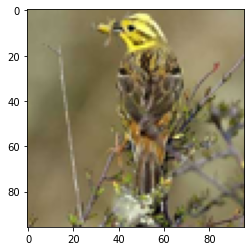

In [19]:
from __future__ import print_function

import sys
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt

if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib # ugly but works
else:
    import urllib

try:
    from imageio import imsave
except:
    from scipy.misc import imsave

print(sys.version_info)

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
DATA_PATH = './data/stl10_binary/train_X.bin'

# path to the binary train file with labels
LABEL_PATH = './data/stl10_binary/train_y.bin'

# returns an array containing the labels
def read_labels(path_to_labels):
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

# return an array containing all the images
def read_all_images(path_to_data):

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel, the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle if you will use a learning algorithm like
        # CNN, since they like their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    """
    CAREFUL! - this method uses a file as input instead of the path - so the
    position of the reader will be remembered outside of context of this method.
    :param image_file: the open file containing the images
    :return: a single image
    """
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    # transpose to standard format
    # You might want to comment this line or reverse the shuffle if you will use a learning algorithm like CNN, since they like their channels separated.
    image = np.transpose(image, (2, 1, 0))
    return image


# Download & extract the STL-10 dataset
def download_and_extract():
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

def save_images(images, labels):
    print("Saving images to disk")
    i = 0
    for image in images:
        label = labels[i]
        directory = './img/' + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        imsave("%s.png" % filename, image, format="png")
        i = i+1
    print("All Images have been saved to disk")

if __name__ == "__main__":
    # download data if needed
    download_and_extract()

    # test to check if the image is read correctly
    with open(DATA_PATH) as f:
        image = read_single_image(f)
        plt.imshow(image)
        plt.show()

    # test to check if the whole dataset is read correctly
    images = read_all_images(DATA_PATH)
    print(images.shape)

    labels = read_labels(LABEL_PATH)
    print(labels.shape)

    # save images to disk
    save_images(images, labels)

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1.2 Data Adjustments [25 points]

In [ ]:
# Resize & Recolor images as necessary

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2 Table of Image features [29 points]

In [ ]:
# Linearize the images to create a table of 1D image features (each row should be 1 image)

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.3 Visualizing Images [30 points]

In [ ]:
# Visualize several images

----------------------------

## 3. Data Reduction
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1 Linear Dimensionality Reduction
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.1 PCA [35 points]

In [ ]:
# Perform linear dimensionality reduction of the images using __PCA__.
# Visualize the explained variance of each component.
# Analyze how many dimensions are required to adequately represent your image data

Explain your analysis and conclusion

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.2 Randomized PCA [40 points]

In [ ]:
# Perform linear dimensionality reduction of your image using __Randomized PCA__
# Visualize the explained variance of each component.
# Analyze how many dimensions are required to adequately represent your image data

Explain your analysis and conclusion

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.3 PCA vs Randomized PCA [60 points]

In [ ]:
# Compare the representation using __PCA__ & __Randomized PCA__.
# The method I choose to compare dimensionality methods should quantitatively explain which method
# is better at representing the images w/ fewer components.

Do you prefer one method over another?
Why?

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2 Feature Extraction [70 points]

In [ ]:
# Perform feature extraction upon the images using any feature extraction technique (e.g. gabor
# filters, ordered gradients, DAISY, etc.).

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.3 Visualizing Feature Extraction efficiency [90 points]
    - Does this feature extraction method show promise for your prediction task? Why?
    - Use visualizations to analyze this questions.
    - Example : Visualize the difference __between statistics of extracted features__ in each target class.
    - Example : Use a heat map of the pairwise differences (ordered by class) among all extracted features.
    - Example : build a nearest neighbor classifier to see actual classification performance.


#### References

Kaggle. STL-10. https://www.kaggle.com/jessicali9530/stl10 (Accessed 9-25-2020)

Adam Coates, Honglak Lee, Andrew Y. Ng An Analysis of Single Layer Networks in Unsupervised Feature Learning AISTATS, 2011.
